In [1]:
# tools for data setup
import numpy as np 
import pandas as pd
import missingno
from collections import Counter

# data visualization libs
import seaborn as sns
import matplotlib.pyplot as plt

# ML Models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#read in the two files - training and test data
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Train Data Shape: ", train.shape)
print("Test Data Shape: ", test.shape)

Train Data Shape:  (891, 12)
Test Data Shape:  (418, 11)


In [6]:
train.info()
print('*'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [7]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Name             0
Pclass           0
PassengerId      0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

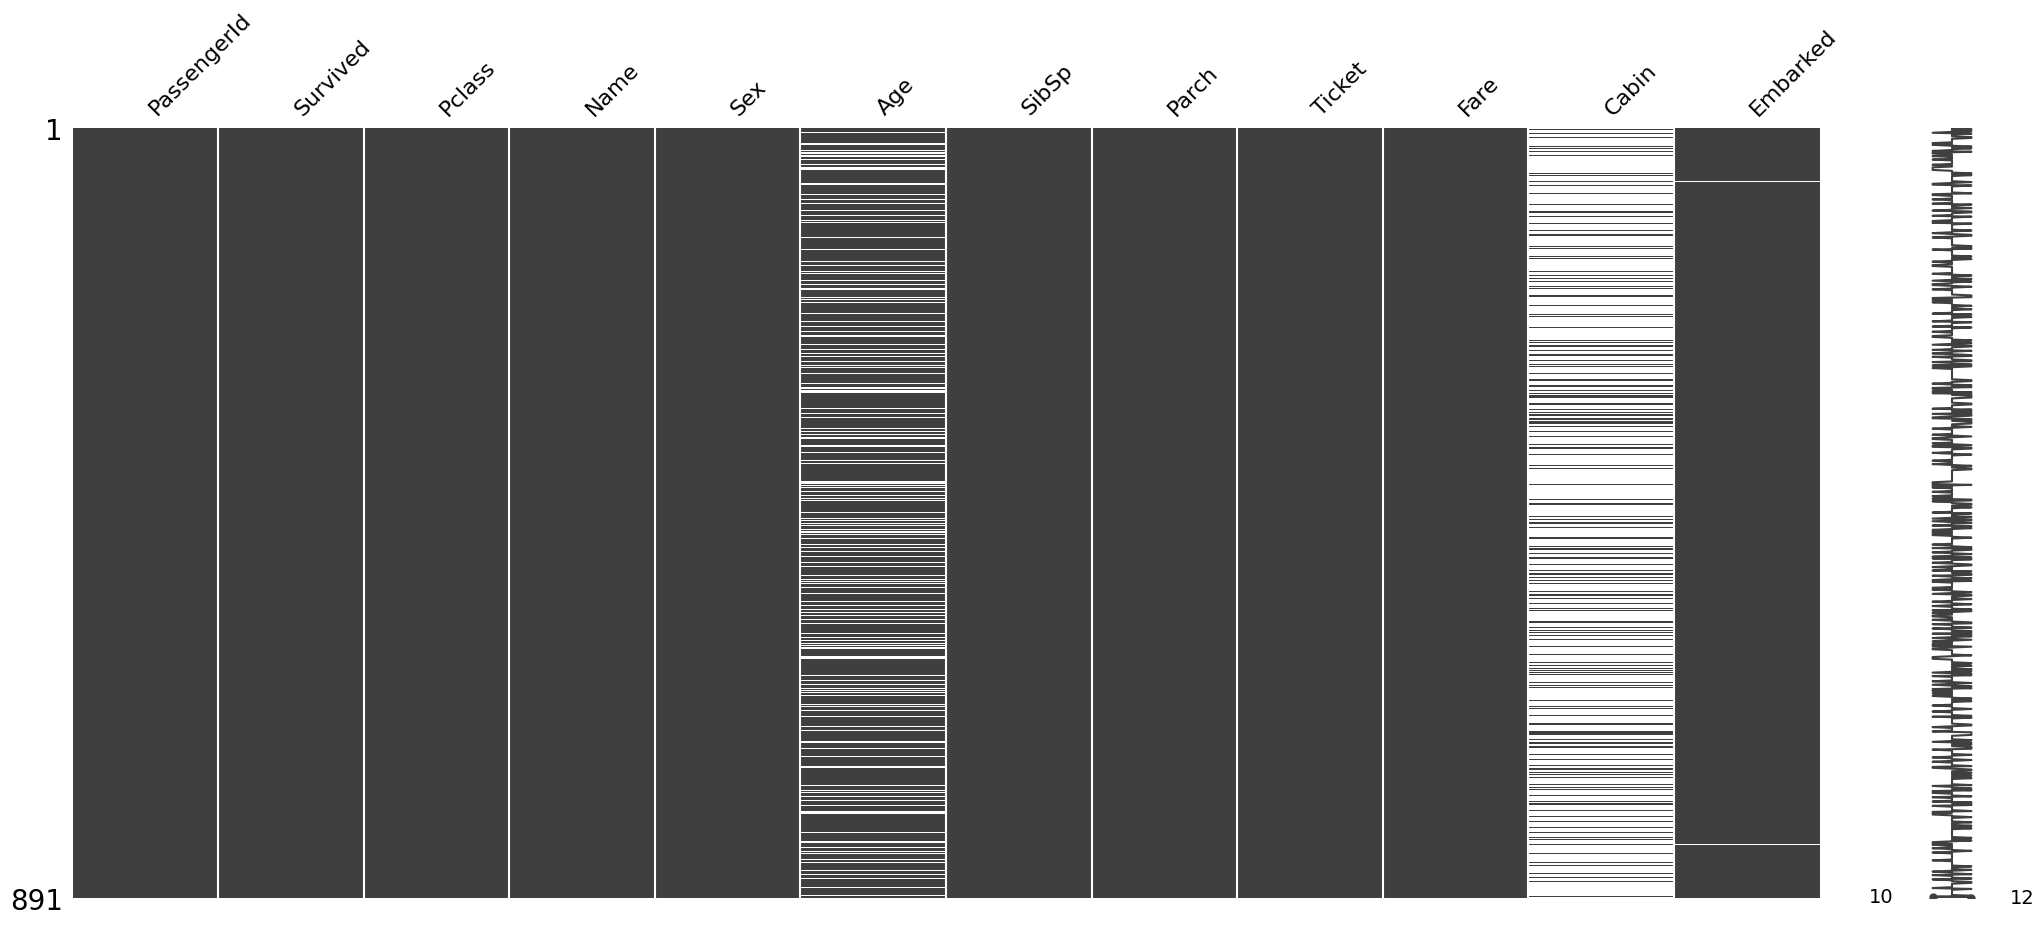

In [9]:
missingno.matrix(train)

<Axes: >

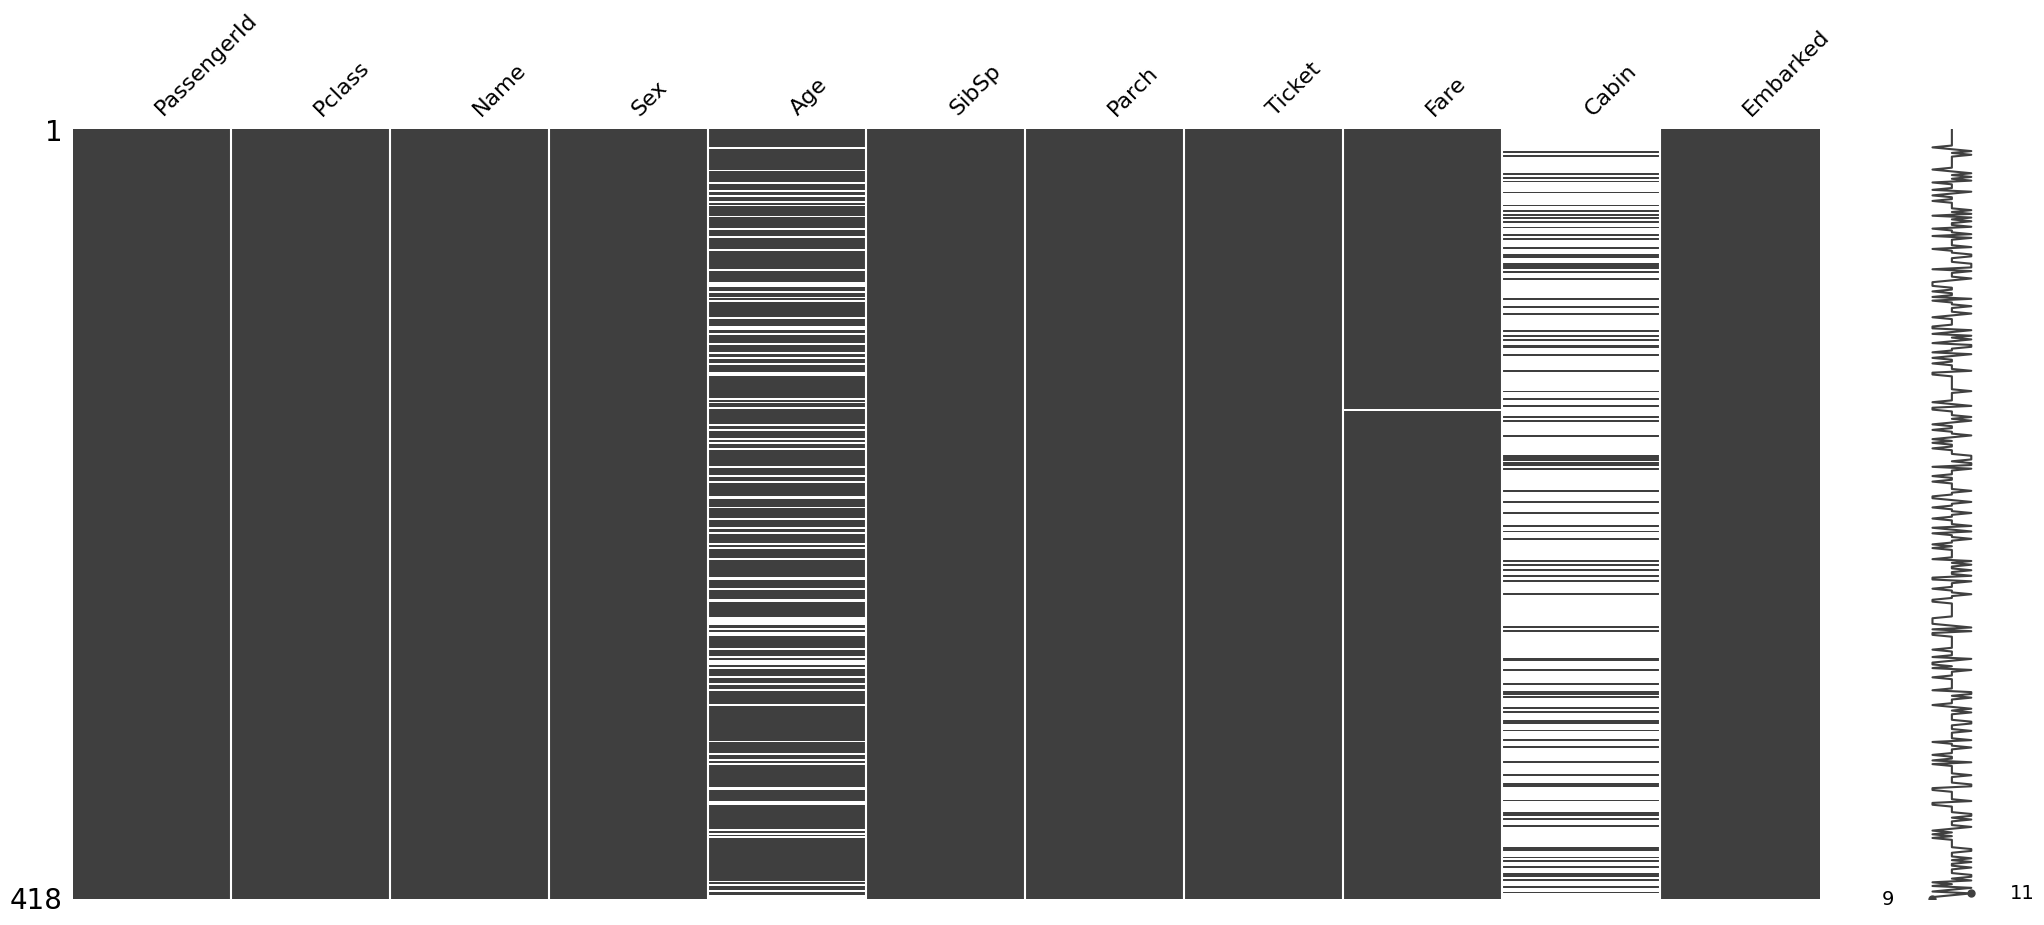

In [10]:
missingno.matrix(test)

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
train['Sex'].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
test['Sex'].value_counts(dropna = False)

Sex
male      266
female    152
Name: count, dtype: int64

In [15]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

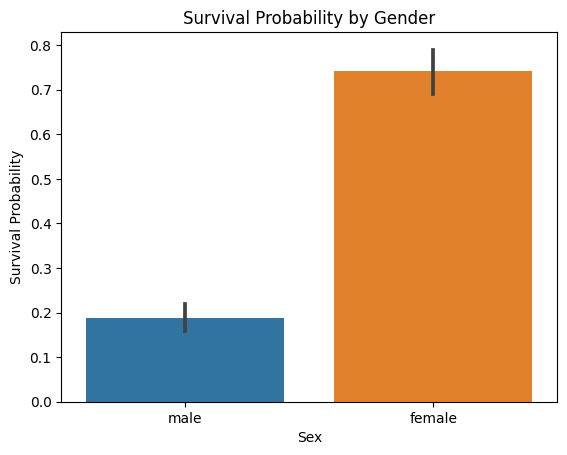

In [16]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

In [17]:
train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival by Passenger Class')

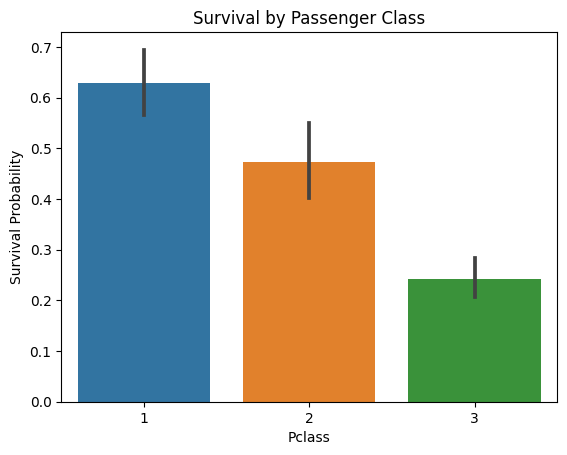

In [19]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival by Passenger Class')

Text(0.5, 1.0, 'Survival Probability by Sex & Passenger Class')

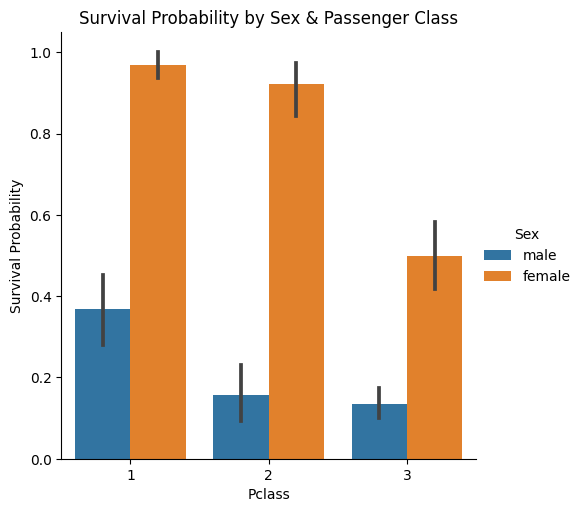

In [20]:
combo = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex & Passenger Class')

In [21]:
train['Embarked'].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [22]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

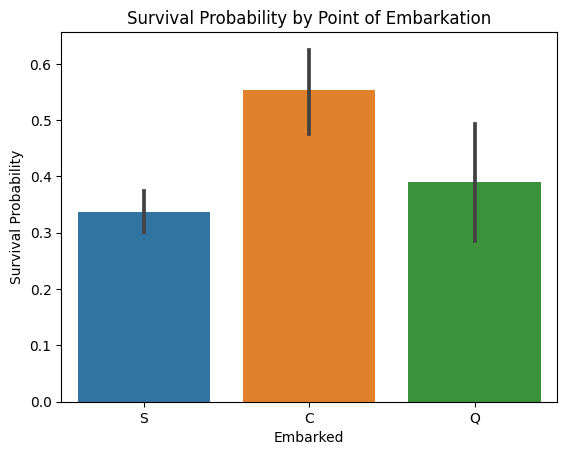

In [23]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

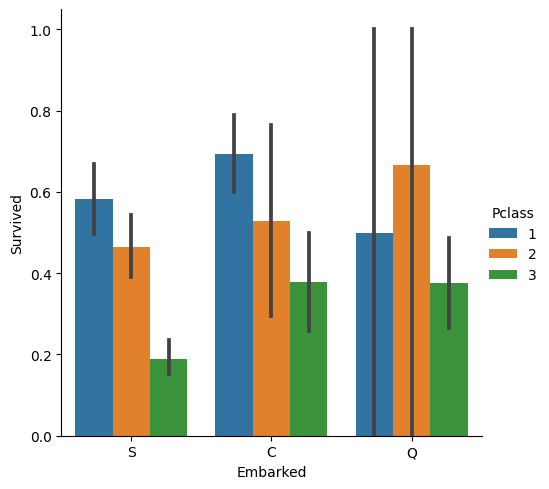

In [24]:
combo1 = sns.catplot(x = 'Embarked', y = 'Survived' , hue = 'Pclass', data = train, kind = 'bar')
# combo = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')

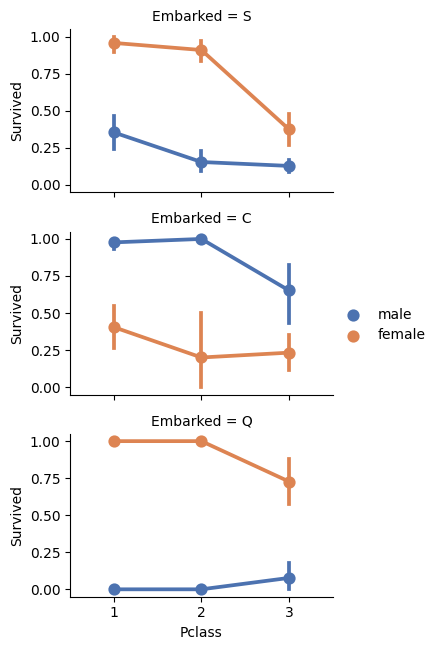

In [25]:
grid = sns.FacetGrid(train, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [26]:
def detect_outliers(df, n, features):
    """
    This function loops through a list of features and finds outliers in each of the features.  In the loop, a data point is deemed an outlier if it is
    less than the first quartile minus the outlier step or exceeds the third quartile plus the outlier step.  The outlier step is defined as 1.5 times the interquartile range.
    Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very
    last feature is completed.  Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.
    """
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [27]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [28]:
#Drop outliers and reset index
print("Before {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After {} rows".format(len(train)))

Before 891 rows
After 881 rows


<Axes: >

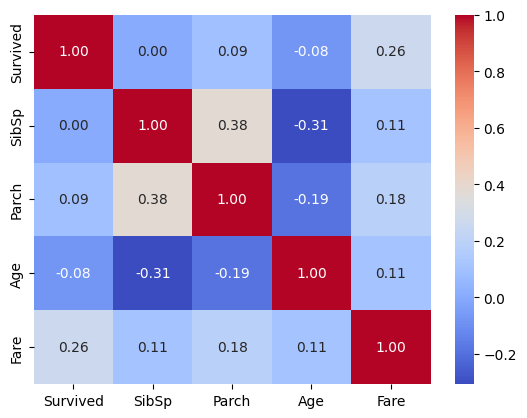

In [29]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [30]:
#value counts of the SibSp column
train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [31]:
# mean survival by SibSp (siblings & spouses)
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

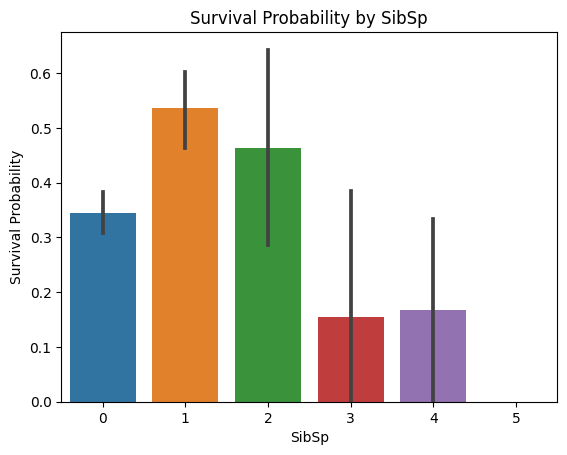

In [32]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [33]:
# Value counts of the Parch column
train['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [34]:
# Mean survival by Parch
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

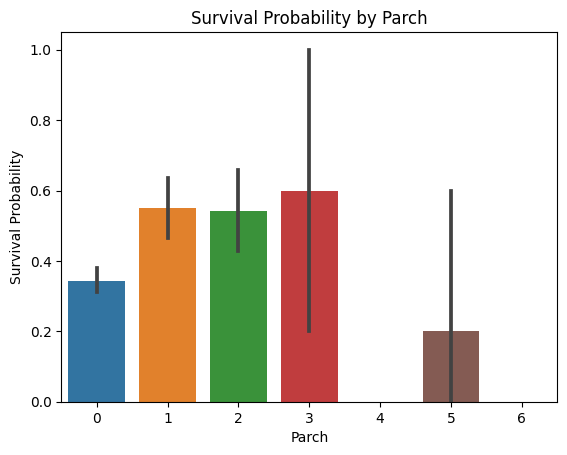

In [35]:
sns.barplot(x = 'Parch', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [36]:
#null values in age column
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passgener Age Distriution')

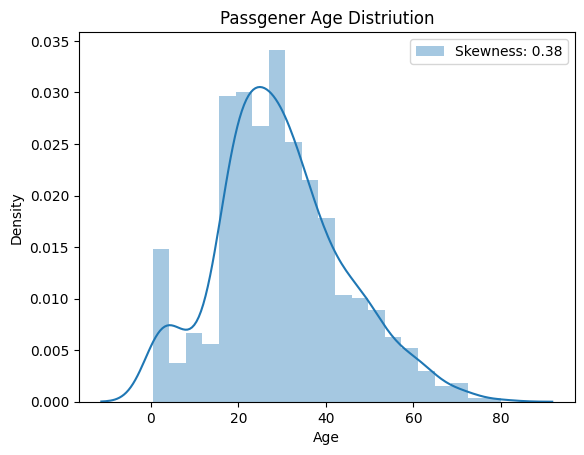

In [37]:
# Passenger age distribution
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passgener Age Distriution')

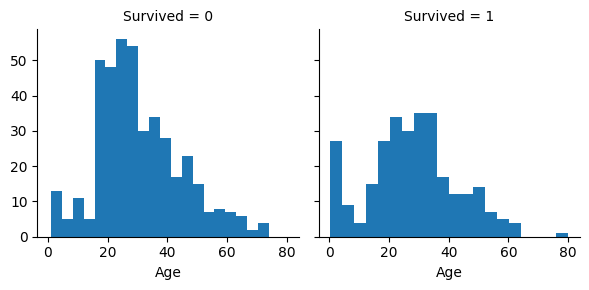

In [38]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
# g.map(sns.displot, 'Age')
g.map(plt.hist, 'Age', bins = 20)
plt.show()

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

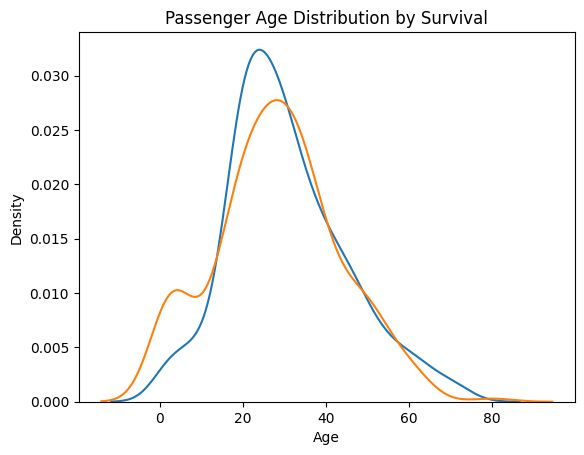

In [39]:
sns.kdeplot(train['Age'][train['Survived']== 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived']== 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [40]:
train['Fare'].isnull().sum()

0

Text(5.069444444444445, 0.5, 'Passenger Fare Distribution')

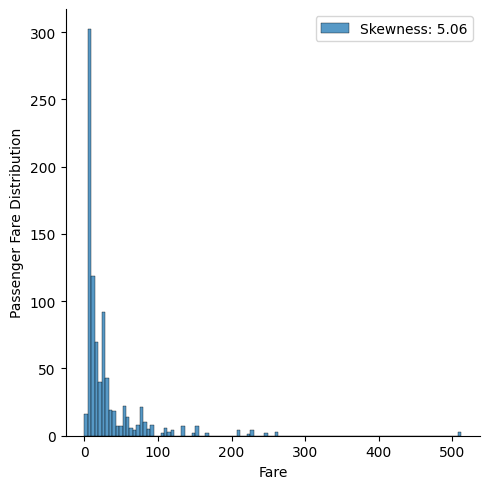

In [41]:
# Passenger fare distribution

sns.displot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [42]:
#Drop ticket featuer from training and test set
train = train.drop(['Ticket'] , axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [43]:
train.isnull().sum().sort_values(ascending = False)

Cabin          680
Age            170
Embarked         2
Pclass           0
Survived         0
PassengerId      0
Name             0
SibSp            0
Sex              0
Fare             0
Parch            0
dtype: int64

In [44]:
mode = train['Embarked'].dropna().mode()[0]

In [45]:
print("mode ", mode)

mode  S


In [46]:
train['Embarked'].fillna(mode, inplace = True)

In [47]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
SibSp            0
Sex              0
Parch            0
Embarked         0
dtype: int64

In [48]:
median = test['Fare'].dropna().median()

In [49]:
print("median ", median)

median  14.4542


In [50]:
test['Fare'].fillna(median, inplace = True)
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Pclass           0
PassengerId      0
Sex              0
Name             0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [51]:
# Extract first letter of cabin
train['CabinLetter'] = train['Cabin'].astype(str).str[0]

# Fill missing values with 'U'
train['CabinLetter'] = train['CabinLetter'].replace('n', 'U')
# Mean survival by CabinLetter
train[['CabinLetter', 'Survived']].groupby('CabinLetter', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,CabinLetter,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.589286
6,G,0.500000
0,A,0.466667
8,U,0.302941
7,T,0.000000


Text(0.5, 1.0, 'Survival Probability by CabinLetter')

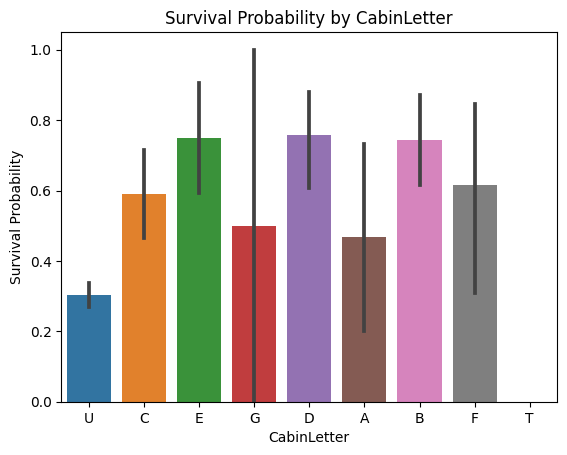

In [52]:
sns.barplot(x = 'CabinLetter', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by CabinLetter')

In [53]:
# Extract first letter of cabin
test['CabinLetter'] = test['Cabin'].astype(str).str[0]

# Fill missing values with 'U'
test['CabinLetter'] = test['CabinLetter'].replace('n', 'U')

In [54]:
#Drop cabin feature from training and test set
train = train.drop(['Cabin'] , axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [55]:
train.isnull().sum().sort_values(ascending = False)

Age            170
Survived         0
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
CabinLetter      0
dtype: int64

In [56]:
test.isnull().sum().sort_values(ascending = False)

Age            86
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Fare            0
Embarked        0
CabinLetter     0
dtype: int64

In [57]:
# Extract first letter of cabin
# test = test.drop(['FamilySize'], axis = 1)
train['FamilySize'] = train['SibSp'].astype(int)+train['Parch'].astype(int)

In [58]:
test['FamilySize'] = test['SibSp'].astype(int)+test['Parch'].astype(int)

In [59]:
train['IsAlone'] = (train['FamilySize'] == 0).astype(int)
test['IsAlone'] = (test['FamilySize'] == 0).astype(int)

Text(0.5, 1.0, 'Survival Probability by IsAlone')

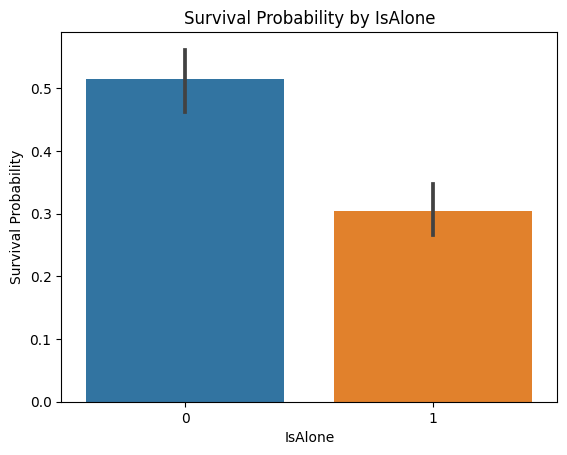

In [60]:
sns.barplot(x = 'IsAlone', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by IsAlone')
# train.info()

In [61]:
#combine both train and test to get info to fill in gaps
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,U,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,U,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,C,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,U,0,1


In [62]:
# missing vals in the combo dataset
combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Name             0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
CabinLetter      0
FamilySize       0
IsAlone          0
dtype: int64

In [63]:
combine['Sex'] = combine['Sex'].map({'male':0, 'female':1})
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,U,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,U,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,C,1,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,U,0,1


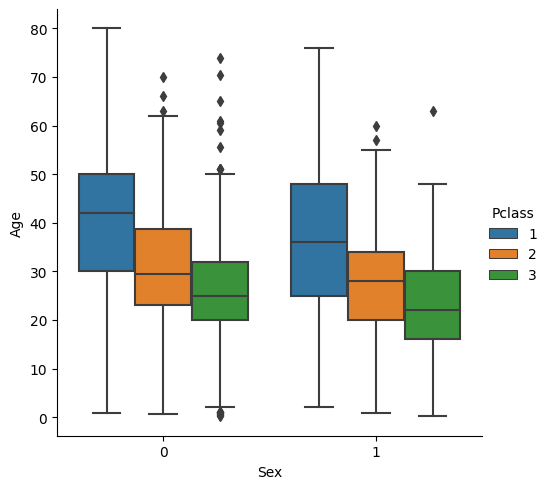

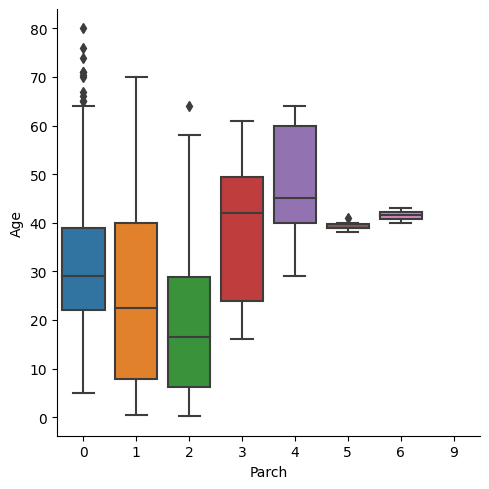

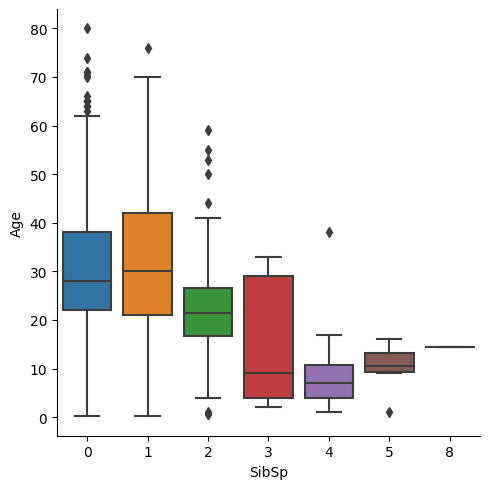

In [64]:
sns.catplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.catplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.catplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

<Axes: >

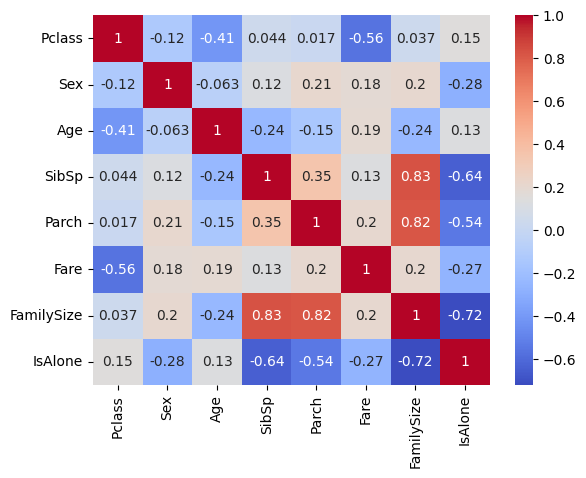

In [65]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Embarked', 'CabinLetter'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [66]:
# Create a dictionary mapping Embarked values to integers
embarked_map = {'S': 0, 'C': 1, 'Q': 2}

# Map the values in the Embarked column to integers
combine['Embarked'] = combine['Embarked'].map(embarked_map)

In [67]:
combine['Embarked'] = (combine['Embarked'] == 0).astype(int)
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   int64  
 5   Age          1043 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Fare         1299 non-null   float64
 9   Embarked     1299 non-null   int64  
 10  CabinLetter  1299 non-null   object 
 11  FamilySize   1299 non-null   int64  
 12  IsAlone      1299 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 132.1+ KB


In [68]:
# Define columns to keep before any modifications to combine
columns_to_keep = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'CabinLetter', 'FamilySize', 'IsAlone']

# Drop non-numeric columns from the dataframe to impute
numeric_df = combine.drop(['PassengerId', 'Name','CabinLetter', 'Survived', 'Embarked'], axis=1)

# Initialize imputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the numeric data
imputed_data = imputer.fit_transform(numeric_df)

# Convert the imputed data back to a DataFrame with the original column names
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)

# Add the imputed column back to the original DataFrame
combine['Age'] = imputed_df['Age']

# Keep only the desired columns in the final DataFrame
combine = combine[columns_to_keep]

combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   int64  
 5   Age          1299 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Fare         1299 non-null   float64
 9   Embarked     1299 non-null   int64  
 10  CabinLetter  1299 non-null   object 
 11  FamilySize   1299 non-null   int64  
 12  IsAlone      1299 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 132.1+ KB


In [69]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   int64  
 5   Age          1299 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Fare         1299 non-null   float64
 9   Embarked     1299 non-null   int64  
 10  CabinLetter  1299 non-null   object 
 11  FamilySize   1299 non-null   int64  
 12  IsAlone      1299 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 132.1+ KB


In [70]:
# Check number of missing ages

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

0

In [71]:
# # Loop through list and input missing ages
# for index in age_nan_indices:
#     median_age = combine['Age'].median()
#     predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp'])
#                                  & (combine['Parch'] == combine.iloc[index]['Parch'])
#                                  & (combine['Pclass'] == combine.iloc[index]['Pclass'])].median()
#     if np.isnan(predict_age):
#         combine['Age'].iloc[index] = median_age
#     else:
#         combine['Age'].iloc[index] = predict_age

In [72]:
    combine['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

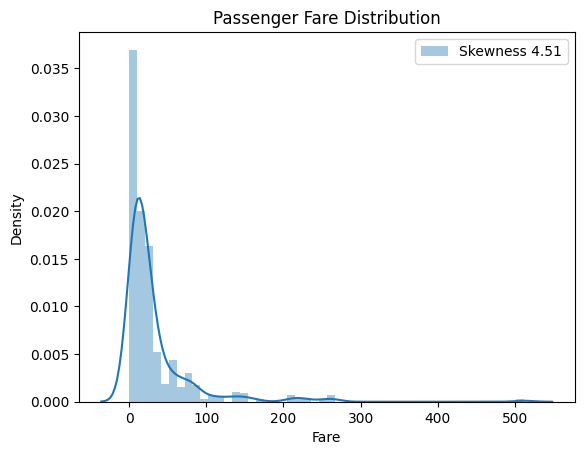

In [73]:
#Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [74]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

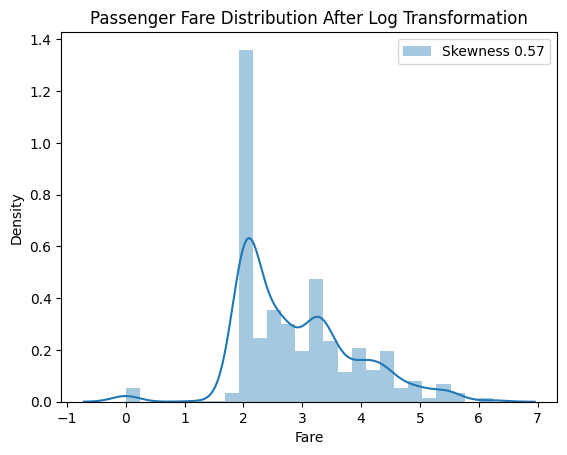

In [75]:
# Distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [76]:
#Moving on to Feature Engineering

In [77]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,1,U,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,0,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,1,U,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,1,C,1,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,1,U,0,1


In [78]:
#Get title from Name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [79]:
combine['Title'].value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [80]:
# Number of unique Title

combine['Title'].nunique()

18

In [81]:
# Simplify Title
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

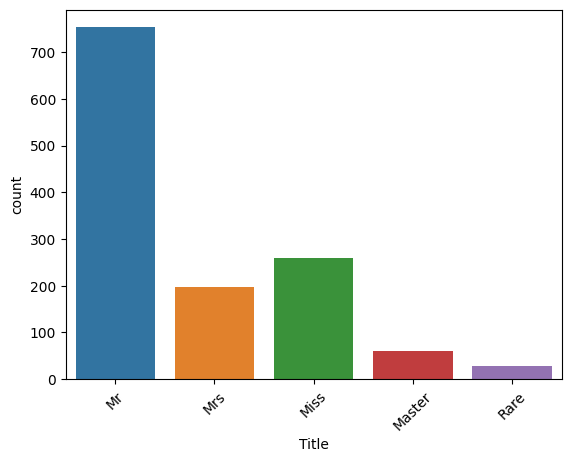

In [82]:
sns.countplot(x='Title', data = combine)
plt.xticks(rotation=45)
plt.show()
# sns.countplot(combine['Title'])

In [83]:
#Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by title')

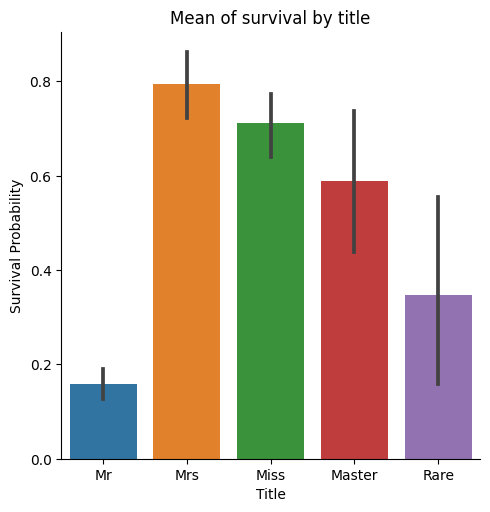

In [84]:
sns.catplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by title')

In [85]:
#Drop Name column
combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone,Title
0,1,0.0,3,0,22.0,1,0,1.981001,1,U,1,0,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,0,C,1,0,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,1,U,0,1,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,1,C,1,0,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,1,U,0,1,Mr


In [86]:
# Drop SibSp, Parch, and FamilySize features from combine dataframe, 
# TODO consider not dropping Family Size in the future

# combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone,Title
0,1,0.0,3,0,22.0,1,0,1.981001,1,U,1,0,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,0,C,1,0,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,1,U,0,1,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,1,C,1,0,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,1,U,0,1,Mr


Text(5.069444444444445, 0.5, 'Age Distribution')

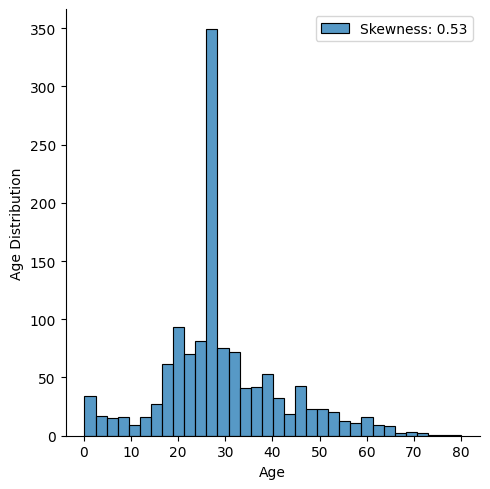

In [87]:
# Age distribution

sns.displot(combine['Age'], label = 'Skewness: %.2f'%(combine['Age'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Age Distribution')

In [88]:
#Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index = False).mean().sort_values(by = 'AgeBand') 

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.346979
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [89]:
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[(combine['Age'] > 64.034), 'Age'] = 4

In [90]:
# Drop age band feature
combine = combine.drop('AgeBand', axis = 1)

In [91]:
#get data types for age and pclass
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [92]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone,Title
0,1,0.0,3,0,1.0,1,0,1.981001,1,U,1,0,Mr
1,2,1.0,1,1,2.0,1,0,4.266662,0,C,1,0,Mrs
2,3,1.0,3,1,1.0,0,0,2.070022,1,U,0,1,Miss
3,4,1.0,1,1,2.0,1,0,3.972177,1,C,1,0,Mrs
4,5,0.0,3,0,2.0,0,0,2.085672,1,U,0,1,Mr


In [93]:
# Convert ordinal age to integer

combine['Age'] = combine['Age'].astype('int')


In [94]:
combine['Age'].dtype

dtype('int64')

In [95]:
# Create Age*Class feature - TODO if age/class aren't correlated then this might actually mess us up.  Review after next submission.

# combine['Age*Class'] = combine['Age'] * combine['Pclass']
# combine[['Age', 'Pclass', 'Age*Class']].head()

In [96]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone,Title
0,1,0.0,3,0,1,1,0,1.981001,1,U,1,0,Mr
1,2,1.0,1,1,2,1,0,4.266662,0,C,1,0,Mrs
2,3,1.0,3,1,1,0,0,2.070022,1,U,0,1,Miss
3,4,1.0,1,1,2,1,0,3.972177,1,C,1,0,Mrs
4,5,0.0,3,0,2,0,0,2.085672,1,U,0,1,Mr


In [97]:
# Encode Title and Embarked feature
# one hot encoding
combine = pd.get_dummies(combine, columns = ['Title'])
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0.0,3,0,1,1,0,1.981001,1,U,1,0,False,False,True,False,False
1,2,1.0,1,1,2,1,0,4.266662,0,C,1,0,False,False,False,True,False
2,3,1.0,3,1,1,0,0,2.070022,1,U,0,1,False,True,False,False,False
3,4,1.0,1,1,2,1,0,3.972177,1,C,1,0,False,False,False,True,False
4,5,0.0,3,0,2,0,0,2.085672,1,U,0,1,False,False,True,False,False


In [98]:
#Divide fare into five bands

combine['FareBand'] = pd.cut(combine['Fare'], 5)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.248]",0.066667
1,"(1.248, 2.496]",0.225627
2,"(2.496, 3.743]",0.431884
3,"(3.743, 4.991]",0.669118
4,"(4.991, 6.239]",0.692308


In [99]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.248, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.248) & (combine['Fare'] <= 2.496), 'Fare'] = 1
combine.loc[(combine['Fare'] > 2.496) & (combine['Fare'] <= 3.743), 'Fare'] = 2
combine.loc[(combine['Fare'] > 3.743) & (combine['Fare'] <= 4.991), 'Fare'] = 3
combine.loc[combine['Fare'] > 4.991, 'Fare'] = 4

In [100]:
combine['Fare'] = combine['Fare'].astype('int')

In [101]:
#Drop FareBand
combine = combine.drop('FareBand', axis = 1)

In [102]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0.0,3,0,1,1,0,1,1,U,1,0,False,False,True,False,False
1,2,1.0,1,1,2,1,0,3,0,C,1,0,False,False,False,True,False
2,3,1.0,3,1,1,0,0,1,1,U,0,1,False,True,False,False,False
3,4,1.0,1,1,2,1,0,3,1,C,1,0,False,False,False,True,False
4,5,0.0,3,0,2,0,0,1,1,U,0,1,False,False,True,False,False


In [103]:
# One-hot encode CabinLetter
combine = pd.get_dummies(combine, columns=['CabinLetter'], prefix='Cabin')

# Drop one of the dummy variables to avoid multicollinearity
combine.drop('Cabin_U', axis=1, inplace=True)  # Assuming 'U' is the unknown category

In [104]:
combine.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,...,Title_Mrs,Title_Rare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0.0,3,0,1,1,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,1,2,1,0,3,0,1,...,True,False,False,False,True,False,False,False,False,False
2,3,1.0,3,1,1,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,4,1.0,1,1,2,1,0,3,1,1,...,True,False,False,False,True,False,False,False,False,False
4,5,0.0,3,0,2,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
5,6,0.0,3,0,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
6,7,0.0,1,0,3,0,0,3,1,0,...,False,False,False,False,False,False,True,False,False,False
7,8,0.0,3,0,0,3,1,2,1,4,...,False,False,False,False,False,False,False,False,False,False
8,9,1.0,3,1,1,0,2,1,1,2,...,True,False,False,False,False,False,False,False,False,False
9,10,1.0,2,1,0,1,0,2,0,1,...,True,False,False,False,False,False,False,False,False,False


In [105]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [106]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,...,Title_Mrs,Title_Rare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0.0,3,0,1,1,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,1,2,1,0,3,0,1,...,True,False,False,False,True,False,False,False,False,False
2,3,1.0,3,1,1,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,4,1.0,1,1,2,1,0,3,1,1,...,True,False,False,False,True,False,False,False,False,False
4,5,0.0,3,0,2,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False


In [107]:
#Drop Passenger ID 

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,...,Title_Mrs,Title_Rare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0.0,3,0,1,1,0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,1.0,1,1,2,1,0,3,0,1,0,...,True,False,False,False,True,False,False,False,False,False
2,1.0,3,1,1,0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1.0,1,1,2,1,0,3,1,1,0,...,True,False,False,False,True,False,False,False,False,False
4,0.0,3,0,2,0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False


In [108]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,...,Title_Mrs,Title_Rare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,3,0,1,1,0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,2,1,0,3,0,1,0,...,True,False,False,False,True,False,False,False,False,False
2,1,3,1,1,0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1,1,1,2,1,0,3,1,1,0,...,True,False,False,False,True,False,False,False,False,False
4,0,3,0,2,0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False


In [109]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,...,Title_Mrs,Title_Rare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
881,892,NaN,3,0,2,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
882,893,NaN,3,1,2,1,0,1,1,1,...,True,False,False,False,False,False,False,False,False,False
883,894,NaN,2,0,3,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
884,895,NaN,3,0,1,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
885,896,NaN,3,1,1,1,1,2,1,2,...,True,False,False,False,False,False,False,False,False,False


In [110]:
test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,...,Title_Mrs,Title_Rare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
881,892,3,0,2,0,0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
882,893,3,1,2,1,0,1,1,1,0,...,True,False,False,False,False,False,False,False,False,False
883,894,2,0,3,0,0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
884,895,3,0,1,0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
885,896,3,1,1,1,1,2,1,2,0,...,True,False,False,False,False,False,False,False,False,False


In [111]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 22)
Y_train shape:  (881,)
X_test shape:  (418, 22)


In [112]:
#Fitting and checking models

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.31

In [113]:
#Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [114]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.82

In [115]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.84

In [116]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

80.59

In [117]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

83.88

In [118]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.16

In [119]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.24

In [120]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.24

In [121]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)
acc_catboost

Learning rate set to 0.00976
0:	learn: 0.6863230	total: 52.1ms	remaining: 52.1s
1:	learn: 0.6816098	total: 52.9ms	remaining: 26.4s
2:	learn: 0.6760010	total: 53.8ms	remaining: 17.9s
3:	learn: 0.6706186	total: 54.7ms	remaining: 13.6s
4:	learn: 0.6655396	total: 55.5ms	remaining: 11.1s
5:	learn: 0.6599681	total: 56.5ms	remaining: 9.35s
6:	learn: 0.6550979	total: 57.4ms	remaining: 8.13s
7:	learn: 0.6495736	total: 58.2ms	remaining: 7.22s
8:	learn: 0.6442365	total: 59.1ms	remaining: 6.5s
9:	learn: 0.6386995	total: 60ms	remaining: 5.94s
10:	learn: 0.6336700	total: 60.9ms	remaining: 5.48s
11:	learn: 0.6283016	total: 61.8ms	remaining: 5.08s
12:	learn: 0.6240714	total: 62.6ms	remaining: 4.75s
13:	learn: 0.6199239	total: 63.4ms	remaining: 4.46s
14:	learn: 0.6152019	total: 64.3ms	remaining: 4.22s
15:	learn: 0.6106906	total: 65.2ms	remaining: 4.01s
16:	learn: 0.6063084	total: 66.1ms	remaining: 3.82s
17:	learn: 0.6013720	total: 67ms	remaining: 3.65s
18:	learn: 0.5975398	total: 67.9ms	remaining: 3.5s

88.31

In [122]:
acc_catboost

88.31

In [123]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})
models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Decision Tree,90.24
1,Random Forest,90.24
2,CatBoost,88.31
3,Linear SVC,83.88
4,Logistic Regression,83.31
5,Support Vector Machines,83.09
6,KNN,80.82
7,Perceptron,80.59
8,Naive Bayes,76.84
9,Stochastic Gradient Decent,76.16


In [124]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [125]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6866281	total: 998us	remaining: 998ms
1:	learn: 0.6805671	total: 1.87ms	remaining: 932ms
2:	learn: 0.6758569	total: 2.66ms	remaining: 885ms
3:	learn: 0.6701114	total: 3.54ms	remaining: 881ms
4:	learn: 0.6642011	total: 4.43ms	remaining: 883ms
5:	learn: 0.6592759	total: 5.25ms	remaining: 869ms
6:	learn: 0.6544228	total: 6.06ms	remaining: 859ms
7:	learn: 0.6486793	total: 6.85ms	remaining: 849ms
8:	learn: 0.6440944	total: 7.66ms	remaining: 843ms
9:	learn: 0.6397618	total: 8.44ms	remaining: 835ms
10:	learn: 0.6350636	total: 9.22ms	remaining: 829ms
11:	learn: 0.6307079	total: 9.98ms	remaining: 822ms
12:	learn: 0.6263195	total: 10.8ms	remaining: 816ms
13:	learn: 0.6225656	total: 11.6ms	remaining: 814ms
14:	learn: 0.6183996	total: 12.3ms	remaining: 811ms
15:	learn: 0.6150463	total: 13.2ms	remaining: 814ms
16:	learn: 0.6106080	total: 14.1ms	remaining: 815ms
17:	learn: 0.6057466	total: 14.9ms	remaining: 815ms
18:	learn: 0.6014125	total: 15.8ms	remaining:

In [126]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())
    

In [127]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.828588,0.038245,Support Vector Machines
1,0.824081,0.036990,Linear SVC
2,0.820697,0.036695,Logistic Regression
3,0.819535,0.034188,KNN
4,0.813841,0.041062,CatBoost
5,0.805963,0.040422,Random Forest
6,0.794586,0.027738,Decision Tree
7,0.792250,0.040807,Stochastic Gradient Descent
8,0.757163,0.038884,Gausian Naive Bayes
9,0.752669,0.052728,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

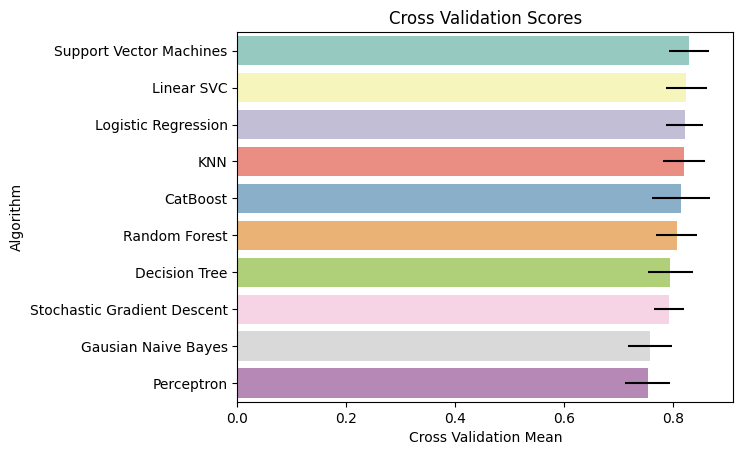

In [128]:
sns.barplot(x='Cross Validation Mean', y='Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [129]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

# for random forest
# param_grid = { 
#     'n_estimators': [25, 50, 100, 150], 
#     'max_features': ['sqrt', 'log2', None], 
#     'max_depth': [3, 6, 9], 
#     'max_leaf_nodes': [3, 6, 9], 
# } 
# grid_search = GridSearchCV(RandomForestClassifier(), 
#                            param_grid=param_grid) 
# grid_search.fit(X_train, Y_train) 
# print(grid_search.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.774 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [130]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator:  SVC(C=1, gamma=0.1)


In [131]:
# grid

In [132]:
svc = SVC(C = 1, gamma = 0.1, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

# random_forest = RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=6,
#                        n_estimators=25)
# random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest

# catboost = CatBoostClassifier()
# catboost.fit(X_train, Y_train)
# Y_pred = catboost.predict(X_test)
# acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)
# acc_catboost

83.2

In [133]:
cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.82858784473953

In [134]:
#Survival predictions by support vector classifier

Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [135]:
len(Y_pred)

418

In [136]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})

In [137]:
submit.shape

(418, 2)

In [138]:
submit.to_csv('submission.csv', index = False)